<h1 style="color: blue; font-size: 72px;"">Short Rate Models  </h1> 

<a style=" font-size: 36px;" href="./Models_de_taux.ipynb">Summary</a>



## 1.Bonds 

A bond is a type of debt security where the issues borrows money from investors and agrees to pay them b ack with interest over a specified period of time. Bonds are commonly issued by governements and companies looking to raise funds for various projects and goals ( Various bonds can be found in the : <a href="https://www.londonstockexchange.com/live-markets/price-explorer/advanced-bond-search" target="_blank">London Stock Exchange </a> website )

Bonds have multiple key features :
- Issuer : The entity that borrows money
- Face Value $F$ : Which is the amount that will be repaid to the bondholder at the bond's maturity. It is usually 1000\$ per bond.
- Coupon Rate $r$ : The interest rate with wich the issuer agrees to pay the owner of the bond. It is almost always a fixed percentage of the bonds Face Value.
- Annual Coupon Payment : $C = r*F$ it's the ammount that the owner of the bonds get 
- Time to Maturity $N$ : The date when the bond's face value will be paid back
- Market interest rate $r_{c}$ : bonds can be bought and sold in the secondary markets before their maturity dates. The price of a bond fluctuates based the current interest rates of the market which is why having an idea of where they will be in the future is important for bond holders

The value of the bond at the time of the acquirement is given by the following formula:

$$
\text{Bond Price} = \sum_{t=1}^{N} \frac{C}{(1+r_{c})^{t}} + \frac{F}{(1+r_{c})^{N}} = \sum_{t=1}^{N} \frac{r*F}{(1 + r_{c})^{t}} + \frac{F}{(1+r_{c})^{N}}
$$


let's say for example that the company Apple : issued bonds on the 10 of february 2023 with the following features :
- Face Value $F$ = 1000\$
- Coupon Rate $r$ = $5$%
- Number of coupons = 5
- Time to Maturity $N$ = 5

on the 10 february 2024, just before the coupon is expected to be paid, let's consider 3 different scenarios :
- The market interest rate didn't change $r = r_{c}$
- The markest interest rate went up by 100 base points $r_{c1} = 6$%
- The markest interest rate went down by 100 base points $r_{c2} = 4$%

let's see how the Bond Price changes in these different scenarios

In [1]:
import matplotlib as plt
from math import *

def Bondprice(F,r,N,rc):
    P = 0 
    for i in range(N) :  
        P += r*F/(1+rc)**i
    P = P + F/(1+rc)**N
    return P
    
print(f" The value of the bond when the interest rate doesn't change is : Bond price = {round(Bondprice(1000,5,5,5),2)}$ \n When it goes up by a 100 base points the value is : Bond price = {round(Bondprice(1000,5,5,6),2)} $ \n When it goes down by a 100 base points the value is : {round(Bondprice(1000,5,5,4),2)}$")
        

 The value of the bond when the interest rate doesn't change is : Bond price = 5999.36$ 
 When it goes up by a 100 base points the value is : Bond price = 5833.05 $ 
 When it goes down by a 100 base points the value is : 6248.32$


## 2 Short-Rate Models
Short-rate models focus on the short rate, which is the interest rate applicable over an incredibly short period of time, known as an infinitesimal. An <a style ="color:blue;" href=""> Infinitesimal</a> is a non-zero quantity that is so close to 0 that it’s smaller than any other non-zero real number. This short rate plays a crucial role in many financial models because it is used to construct the entire term structure of interest rates (also known as the yield curve), which shows the relationship between interest rates and different time horizons.

## <b>How Short-Rate interest models work ?</b>
A short-rate model typically represents the short rate $𝑟(𝑡)$ as a stochastic process, meaning that its path is driven by both deterministic (predictible) and Brownian (random )factors. The short rate keeps fluctuating over time due to the inherent uncertainty of financial markets.


- **deterministic Factors** : this component models predictibal tendencies like mean-reverting behavior as interest rates tend to move towards a long-term equilibrum
- **Brownian Motion** : Often Modeled using brownian motion, it reprents the uncertainty and volatility of financian markets
  
  
as mentionned, the short rate is modeled by a stochastic differential equation (SDE) under the form : 

$$ dr(t) = {\mu}(r(t),t)dt + {\sigma}(r(t),t){dW(t)}$$

in this equation : 
- ${\mu}(r(t),t)$ is called the **drift** term it represents the expected change of the rate $r(t)$ over an infinitesimal time interval.
- ${\sigma(r(t),t)}$ is the **volatility** term, is reflects the level of uncertainty in the movement of the short rate
- $dW(t)$ represents a Brownian Motion, a standard mathematical model for random fluctuations in financial processes 

### <a id ="vasicek"> 2.1 Vacisek Model (1977) </a>

The Vasicek Model, introduced in 1977, is one of the earliest and most recognized models used to describe how interest rates behave over time. It's a **mean-reverting** short-rate model, meaning it assumes that while interest rates can fluctuate randomly, they eventually tend to revert back toward a long-term average. The Vasicek model was revolutionary for its time because it gave a mathematically manageable way to track the evolution of interest rates, especially in times of economic uncertainty (end of the gold standard in 1971, 1973 Oil Crisis, Collapse of Breton Woods etc ...)



The Vacisek Model uses an SDE as seen above : 

$$ dr(t)= a(b-r(t))dt + {\sigma}d{W(t)} $$

Where :
- $r(t)$ os the short rate at time t.
- $a$ is the speed of mean reversion, in simpler terms it represents how quickly the sort rate returns to its long-term mean.
- $b$ is the long-term mean rate that the rate is supposed to revert to.
- ${\sigma}$ is the **Volatility** which is the standard
- $dW(t)$ is the increment of the Wiener process ( a Brownian motion with $\mathbb{E}[X]$ = 0, $\text{Var}(X) = f(t)$)
  


Interpretation :

 $$ a(b-r(t)) $$ 
 
This part of the model is known as the **Deterministic Component**. It pulls the short rate back toward its long-term mean, denoted as $𝑘$. Whenever the short rate $𝑟(𝑡)$ rises above the long-term mean $k$, the deterministic component becomes negative, pulling the rate back down. Since the **Wiener process** has a mean of zero, it doesn't affect this tendency. The parameter $a$ controls the speed of this reversion, meaning it dictates how fast or slow the rate moves back toward the mean $k$. A large $a$ means a faster adjustment, while a smaller $a$ results in slower reversion.


$$ {\sigma} dW(t)$$

This term represents the random fluctuations in the sort rate due to market volatility, it models the uncertainty in interest rate movements. The parameter ${\sigma}$ represents the size of these fluctuations (i.e, **the volatility**). The higher the ${\sigma}$ the more volatile the interest rates.

## 2.1.1 Test

In this section we are going to try to implement the Vasicek Model on the US Federal_Fund_Rates date that we will fetch using opensource Free API AlphaVantage : https://www.alphavantage.co/documentation/#

My goal, was to use the Maximum likelihood estimation Method f to estimate Vasicek parameters, and then stimulate different possible scenarios for our function.

In [2]:
#Importing all libraries and relevant tools for conveniency 

import requests 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.optimize import minimize 

# Using AlphaVantage free API Key and documentation we can import data from the recent FEDERAL FUND RATES, which are the interest rate at which instituions lend money to other institutions overnight in the United States of America 
api_key = 'MNBX49QP1JKFK3KG'
url = f'https://www.alphavantage.co/query?function=FEDERAL_FUNDS_RATE&apikey={api_key}'
response = requests.get(url)
data = response.json()


# Converting the JSON data to a DataFrame because dataframes are easier to work with 
ffr_df = pd.DataFrame(data['data'])
ffr_df['date'] = pd.to_datetime(ffr_df['date'])
ffr_df['value'] = pd.to_numeric(ffr_df['value'])


Let's display the rates we got from our 2 tables

1- Estimating the Parameters : 
in order to do so, we are going to use the Maximum likelihood estimation.
First we use the Ito formula to $r_t \exp(-a\delta)$ to obtain the explicit form of the Vacicek rate 
$$r_{t + \delta} = r_t e^{-a\delta} + k(1 - e^{-a\delta}) + \sigma \sqrt{\frac{1 - e^{-2a\delta}}{2a}} \varepsilon, \quad \varepsilon \sim \mathcal{N}(0, 1)$$
with ${\epsilon}$ the Standard Normal Noise $\mathcal{N}(0, 1)$

$$ \log(L(a,b,\sigma)) = \sum_{t = 1}^{n} \frac{1}{E \sqrt{2 \pi}} \exp\left( - 0.5 \frac{(x - sig)^2}{E^2} \right)$$

with $E = V  \sqrt\frac{ 1 - \exp(-2at)}{2a}$  
and 
$ sig = r  \exp(-a*t) + K ( 1 - \exp(-at))$ 

In [3]:
#We supposed that the volatility is constant ( which is not plausible)
data_ = ffr_df['value']
X_train = data_ [:300]
X_test = data_ [50:]


STD = np.std(ffr_df['value']/100)
v = STD* np.sqrt(12)
print(v)

0.12373113986190391


In [4]:
#Defining the normal distribution affiliated with the model
def N_Vas(x,a,k,t,r):
    
    E = v * np.sqrt((1 - np.exp(-2 * a * t)) / (2 * a))
    
    sig = r * np.exp(-a * t) + k * (1 - np.exp(-a * t))
    
    return ((1 / (E * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - sig) / E)**2))
# Defining the maximum likelihood estimation
def log_likelihood(parameters, X_train):
    a, k = parameters
    S=0
    t=1/12
    epsilon = 1e-15 
    #Here I added a very small number because I had some cases where P was equal to 0
    for i in range (len(X_train)-1):
        P = N_Vas(X_train[i+1], a, k, t, X_train[i])
        if (P > 0 ):
             S-=np.log(P)      
    return(S)

In [5]:

# Estimating the parameters with the constraints on a and k being positive 
constraints = ({'type': 'ineq', 'fun': lambda params: np.exp(params[0])},  # a >= 0
               {'type': 'ineq', 'fun': lambda params: params[1]})  # k >= 0

estimateresults = minimize(log_likelihood, [1, 2], args=(X_train,), constraints=constraints)
estimated_parameters = estimateresults.x
# print the estimated parameters
estimated_a, estimated_k = estimated_parameters
print(f" the estimated parameter a is : {estimated_a} \n the estimated parameter b is : {estimated_k}")


 the estimated parameter a is : -0.0008841812682439814 
 the estimated parameter b is : 0.017795238742232822


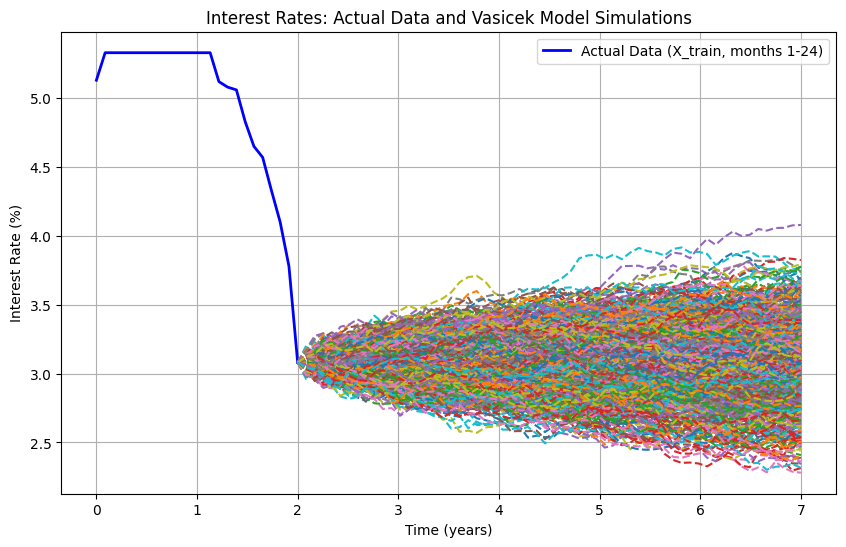

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Our Vasicek parameters, we estimated a and k prior to that and calculated Sigma
a = -0.0008841812682439814     
b = 0.017795238742232822  
sigma = 0.12373113986190391  
r0 = X_train[23]  

# Simulation settings
T = (84 - 24) / 12   # Total time in years (13 years from month 24 to 180)
dt = 1 / 12  # Monthly time steps
N = int(T / dt)  # Number of steps (156 months or 13 years)
t = np.linspace(0, T, N)  # Time for the simulations (years)
num_simulations = 1000  
t_real = np.linspace(0, 2, 24)  # Time for the actual data (2 years)

# Vasicek Path
def sim_vasicek(a, b, sigma, r0, N, dt):
    r = np.zeros(N)
    r[0] = r0
    dW = np.random.normal(0, np.sqrt(dt), N)
    for i in range(1, N):
        dr = a * (b - r[i-1]) * dt + sigma * dW[i]
        r[i] = r[i-1] + dr
    return r

# Plot the actual data (X_train) for the first 24 months
plt.figure(figsize=(10,6))
plt.plot(t_real, X_train[:24], label='Actual Data (X_train, months 1-24)', color='blue', linewidth=2)

# Plot multiple Vasicek simulations from month 24 to month 180
for i in range(num_simulations):
    r_vasicek = sim_vasicek(a, b, sigma, r0, N, dt)
    plt.plot(np.linspace(2, 7, N), r_vasicek, linestyle='--')
#you can add  label=f'Simulation {i+1}' inside the plt.plot to have the colors of each simulations  
plt.title('Interest Rates: Actual Data and Vasicek Model Simulations')
plt.xlabel('Time (years)')
plt.ylabel('Interest Rate (%)')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()


This plot showcase the interest rate in the last 2 years ( 01-09-2022 to 01-09-2024) and then 1000 different simulations for the next 15 upcoming years

This Model presents multiples qualities but also limits :  
**Qualities** 
- Mean-Reversion :  One of the most notable advantages of this model is its ability to capture the mean-reversion behavior of interest rates, which aligns with empirical observations. Interest rates tend to fluctuate around a long-term average, and this model reflects that reality effectively.
- Simplicity : this model is simple to implement as you have seen above
- Analytical solution : Another key strength is its mathematical tractability. The model offers closed-form solutions for the pricing of bonds and certain derivatives, such as zero-coupon bonds, making it efficient and practical for many financial applications.   

**Limits**

- Constant votality : One limitation is the assumption that volatility remains constant over time. In reality, volatility fluctuates due to changing economic conditions, and this model does not account for that variation, potentially reducing its accuracy.
- Posibility of Negative rates : The vasicek model allows for the possibility of **negative** interest rates. This happens because the model is based on a normal destribution for interest rate changes which doesn't prevent negative values even though in most markets, negative rates are often unrealistic ( that is not always the case ECB 2014, SNB 2015).

## 3 Cox-Ingersoll-Ross (CIR) model ( 1985)


The **Cox-Ingersoll-Ross** model is a widely recognized interest rate model that improves upon the limitations of the *Vasicek model* especially when dealing with short-term interest rate dynamics.
The CIR models addresse some of they key weaknesses found in the Vasicek model, particularly its allowance for *negative* interest rates, which this mode succesfully avoids.

The CIR Model uses the following Stochastic differential equation : 

$$ dr(t) = a(b-r(t))dt + \sigma\sqrt{r(t)} dW(t) $$

Where again :
- $r(t)$ os the short rate at time t.
- $a$ is the speed of mean reversion, in simpler terms it represents how quickly the sort rate returns to its long-term mean.
- $b$ is the long-term mean rate that the rate is supposed to revert to.
- ${\sigma}$ is the **Volatility** which is the standard
- $dW(t)$ : is the increment of the Wiener process ( a Brownian motion with $\mathbb{E}[X]$ = 0, $\text{Var}(X) = f(t)$)

the following conditions needs to be respected $ a, b, r_{0} = r(0) , \sigma $ positive and $ 2ab > \sigma^{2} $
  

The critical different of the CIR model is that it prevents **negative values**. the term $ \sqrt{r(t)} $ in the volatility function ensures that the variance of the rate changes becomes smaller as the interest rate approaches zero. This means that the model naturally prevents rates from becoming negative because as r(t) gets closer and closer to 0, the drift term $a(b-r(t))$ pulls the rate back up while the volatility part gets smaller

# 3.1 Test 
There is no explicit solution to this model so we will transform the differential to a small variation : 

$$\Delta r = a(b - r_t) \, \Delta t + \sigma \sqrt{r_t} \, \sqrt{\Delta t} \, \varepsilon, \quad \varepsilon \sim \mathcal{N}(0, 1)$$

once again we will code the normal disturbution function and use and MSE method to try to estimate parameters based on data of the Federal funds rates evolutions and then run multiple scenarios going for the upcoming next 5 years

In [7]:
#Defining the normal distribution affiliated with the model
def N_CIR(x, a, k, t, r):
    
    E = v * np.sqrt(r * t)
    
    sig = r + t * a * (k - r)
    return ((1 / (E * np.sqrt(2 * np.pi))) * np.exp(-0.5 * np.square((x - sig) / E)))
def log_likelihood_CIR(paramètres, X_train):
    a, k = paramètres
    S=0
    t=1/12
    for i in range (len(X_train)-1):
        P = (N_CIR(X_train[i+1], a, k, t, X_train[i])) 
        if (P>0) :
             S-=np.log(P) 
    return(S)
    

In [8]:


# Estimating the parameters with the constraints on a and k being positive 
constraints = ({'type': 'ineq', 'fun': lambda params: np.exp(params[0])},  # a >= 0
               {'type': 'ineq', 'fun': lambda params: params[1]})  # k >= 0

estimateresults = minimize(log_likelihood_CIR, [1,2], args=(X_train,), constraints=constraints)
estimated_parameters = estimateresults.x
# print the estimated parameters
estimated_a, estimated_k = estimated_parameters
print(f" the estimated parameter a is : {estimated_a} \n the estimated parameter b is : {estimated_k}")



 the estimated parameter a is : 0.026254797279032998 
 the estimated parameter b is : 1.1089972245718334


we can indeed check that : 
$$ 2 ab = 0.05823299462828743 > \sigma^{2} = 0.015309394971526027 $$ 

In [9]:
log_likelihood([0.5,1],X_train)


4272.604528785265

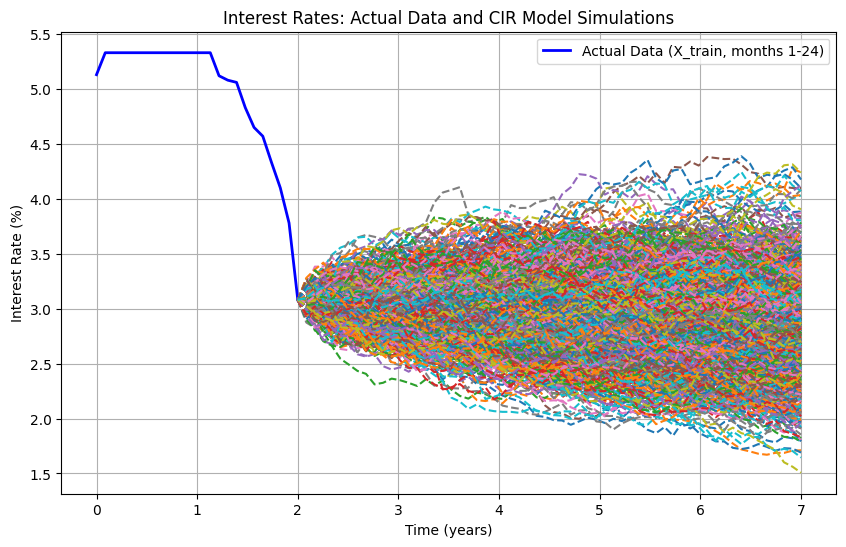

In [10]:
# Our CIR parameters, we estimated a and k prior to that and calculated Sigma
a = 0.026254797279032998  
b = 1.1089972245718334  
sigma = 0.12373113986190391  
r0 = X_train[23]  

# Simulation settings
T = (84 - 24) / 12   # Total time in years (13 years from month 24 to 180)
dt = 1 / 12  # Monthly time steps
N = int(T / dt)  # Number of steps (156 months or 13 years)
t = np.linspace(0, T, N)  # Time for the simulations (years)
num_simulations = 1000  
t_real = np.linspace(0, 2, 24)  # Time for the actual data (2 years)

# CIR Path
def sim_CIR(a, b, sigma, r0, N, dt):
    r = np.zeros(N)
    r[0] = r0
    dW = np.random.normal(0, np.sqrt(dt), N)
    for i in range(1, N):
        dr = a * (b - r[i-1]) * dt + sqrt(r[i-1])*sigma * dW[i]
        r[i] = r[i-1] + dr
    return r

# Plot the actual data (X_train) for the first 24 months
plt.figure(figsize=(10,6))
plt.plot(t_real, X_train[:24], label='Actual Data (X_train, months 1-24)', color='blue', linewidth=2)

# Plot multiple CIR simulations from month 24 to month 180
for i in range(num_simulations):
    r_CIR = sim_CIR(a, b, sigma, r0, N, dt)
    plt.plot(np.linspace(2, 7, N), r_CIR, linestyle='--')
#you can add  label=f'Simulation {i+1}' inside the plt.plot to have the colors of each simulations  
plt.title('Interest Rates: Actual Data and CIR Model Simulations')
plt.xlabel('Time (years)')
plt.ylabel('Interest Rate (%)')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()


Problems and avancement :

- need to replace b by k in all formulas
- need to figure out a way to fix log(P) = 0 


(843,)
